In [1]:
#Task 1
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

df=pd.DataFrame(iris.data,columns=iris.feature_names)

print(df.head())

print("Shape-",df.shape)

print("Featue Names-",df.columns)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Shape- (150, 4)
Featue Names- Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [9]:
#Task 2
print("->Mean<-\n",df.mean(numeric_only=True))
print("->Median<-\n",df.median(numeric_only=True))
print("->Mode<-\n",df.mode(numeric_only=True))
print("->Standard Deviation<-\n",df.std(numeric_only=True))

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = (df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))
print()
print(outliers.sum())   


->Mean<-
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
->Median<-
 sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64
->Mode<-
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.0               3.0                1.4               0.2
1                NaN               NaN                1.5               NaN
->Standard Deviation<-
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

sepal length (cm)    0
sepal width (cm)     4
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [10]:
#Task 3


# ---- Step 1: Compute Z-score for each feature ----
z_scores = (df - df.mean()) / df.std()

# ---- Step 2: Identify data points where |Z| > 3 ----
outliers = z_scores.abs() > 3

# ---- Step 3: Count number of outliers per feature ----
outlier_count = outliers.sum()

print("Outliers per feature:")
print(outlier_count)




Outliers per feature:
sepal length (cm)    0
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     0
dtype: int64


The freq table for sepal length: 
sepal length (cm)
5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
6.4     7
5.5     7
5.8     7
4.9     6
6.0     6
5.4     6
5.6     6
6.1     6
6.5     5
4.8     5
7.7     4
6.9     4
4.6     4
5.2     4
6.2     4
4.4     3
7.2     3
5.9     3
6.8     3
4.7     2
6.6     2
4.3     1
7.0     1
5.3     1
4.5     1
7.1     1
7.3     1
7.6     1
7.4     1
7.9     1
Name: count, dtype: int64



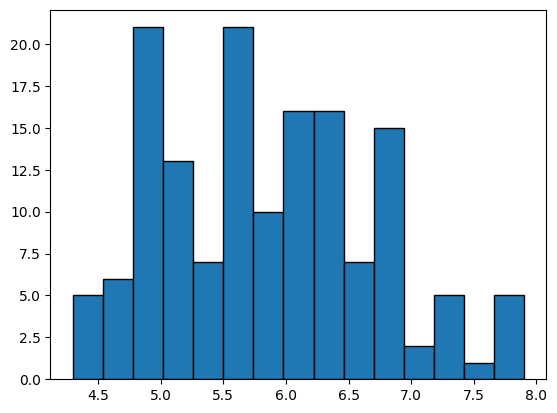

In [13]:
#Task 4
import matplotlib.pyplot as plt
freq=df['sepal length (cm)'].value_counts()
print("The freq table for sepal length: ")
print(freq)
print()
plt.hist(df['sepal length (cm)'],bins=15,edgecolor="black")
plt.show()


In [ ]:
#Task 5
df.select_dtypes(include="number").corr() #Or simply df.corr(numeic_only=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Axes: >

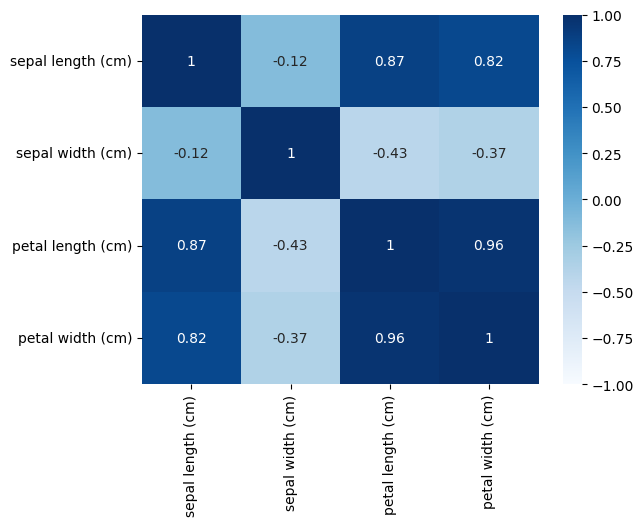

In [23]:
#Task 6
import seaborn as sns

corr=df.corr()
sns.heatmap(data=corr,annot=True,cmap="Blues",vmin=-1)


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

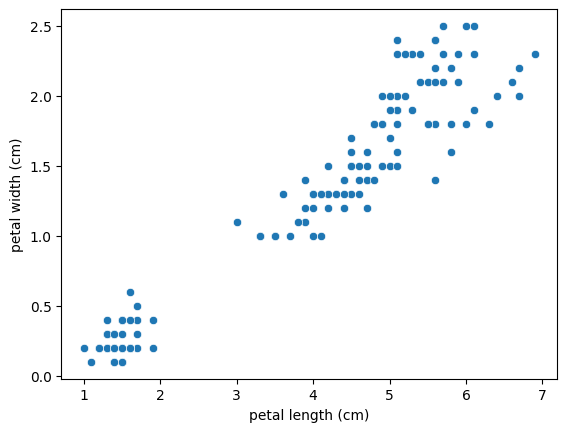

In [24]:
#Task 7
sns.scatterplot(data=df,x='petal length (cm)',y='petal width (cm)')